In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [58]:
df = pd.read_csv(r"/content/labeled_tweets.csv")

In [59]:
df1 = df.copy()
df1=df1.drop_duplicates(subset=['full_text'], keep=False)
df1.head()
df1

,id,label,full_text
6,5.720000e+17,Offensive,of course you were born in serbia...you're as ...
7,5.720000e+17,Offensive,These girls are the equivalent of the irritati...
10,5.750000e+17,Offensive,"RT @PhxKen: SIR WINSTON CHURCHHILL: ""ISLAM IS ..."
11,5.690000e+17,Offensive,RT @TheRightWingM: Giuliani watched his city a...
12,4.460000e+17,Offensive,RT @YesYoureRacist: At least you're only a tin...
...,...,...,...
11957,NaN,Offensive,@BitchImFancy lol so retarded
11958,NaN,Offensive,@BitchImaStunna @VeshaaCouture lmao bitch shut up
11959,NaN,Offensive,@BitchMedia what's up my bitches?! Shout out f...
11960,NaN,Offensive,@Bitcheslovestar The only one of Mary's friend...


In [60]:
df1 = df1.dropna()
df1

,id,label,full_text
6,5.720000e+17,Offensive,of course you were born in serbia...you're as ...
7,5.720000e+17,Offensive,These girls are the equivalent of the irritati...
10,5.750000e+17,Offensive,"RT @PhxKen: SIR WINSTON CHURCHHILL: ""ISLAM IS ..."
11,5.690000e+17,Offensive,RT @TheRightWingM: Giuliani watched his city a...
12,4.460000e+17,Offensive,RT @YesYoureRacist: At least you're only a tin...
...,...,...,...
9433,5.720000e+17,Non-offensive,mmmm #MKR getting v boring @lisamromano @garyd...
9434,5.720000e+17,Non-offensive,"""Sass"" 😆😈😆\nRT @arna_jane: They say sass one m..."
9435,5.720000e+17,Non-offensive,“@jgto: Steve’s starting to annoy me #MKR”\n\n...
9436,5.720000e+17,Non-offensive,“@4Cate: Has Colin outside for a smoke #mkr”\...


In [61]:
from sklearn.model_selection import train_test_split

X = df1['full_text']
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

6       of course you were born in serbia...you're as ...
7       These girls are the equivalent of the irritati...
10      RT @PhxKen: SIR WINSTON CHURCHHILL: "ISLAM IS ...
11      RT @TheRightWingM: Giuliani watched his city a...
12      RT @YesYoureRacist: At least you're only a tin...
                              ...                        
9433    mmmm #MKR getting v boring @lisamromano @garyd...
9434    "Sass" 😆😈😆\nRT @arna_jane: They say sass one m...
9435    “@jgto: Steve’s starting to annoy me #MKR”\n\n...
9436    “@4Cate: Has Colin outside for a smoke  #mkr”\...
9437                      "@panelrific: Let's go 🐧🐧🐧🐧🐧🐧😃"
Name: full_text, Length: 9268, dtype: object
6           Offensive
7           Offensive
10          Offensive
11          Offensive
12          Offensive
            ...      
9433    Non-offensive
9434    Non-offensive
9435    Non-offensive
9436    Non-offensive
9437    Non-offensive
Name: label, Length: 9268, dtype: object


In [62]:
df1.to_csv('/content/drive/MyDrive/Miniprojectv')

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Preprocessing and vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [65]:
# Initialize and train the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
# Make predictions on the testing set
y_pred_test = svm_clf.predict(X_test_tfidf)

In [67]:
# Evaluate the model on the testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, y_pred_test))

Classification Report on Testing Set:
               precision    recall  f1-score   support

Non-offensive       0.88      0.95      0.91      1280
    Offensive       0.86      0.72      0.78       574

     accuracy                           0.88      1854
    macro avg       0.87      0.83      0.85      1854
 weighted avg       0.87      0.88      0.87      1854



In [68]:
y_pred_train = svm_clf.predict(X_train_tfidf)

# Evaluate the model on the training set
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train))

Classification Report on Training Set:
               precision    recall  f1-score   support

Non-offensive       0.95      0.99      0.97      5120
    Offensive       0.97      0.89      0.93      2294

     accuracy                           0.96      7414
    macro avg       0.96      0.94      0.95      7414
 weighted avg       0.96      0.96      0.96      7414



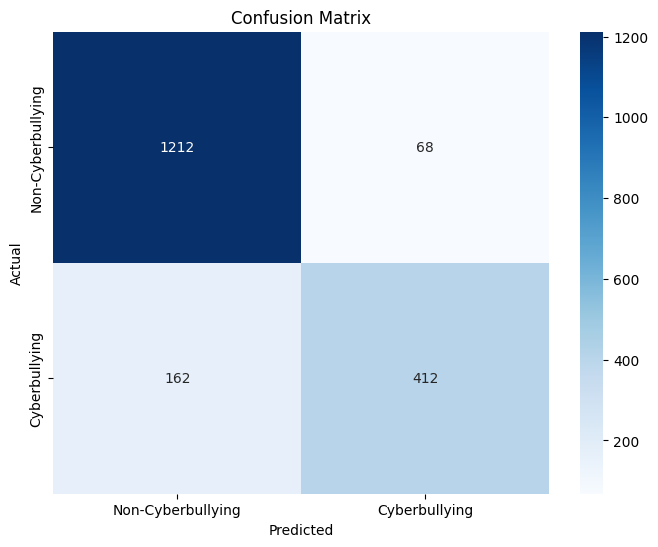

In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Convert categorical labels to binary format
y_test_binary = y_test.map({'Non-offensive': 0, 'Offensive': 1})

# ROC curve and AUC-ROC
y_pred_probs = svm_clf.decision_function(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_probs)
auc_roc = roc_auc_score(y_test_binary, y_pred_probs)


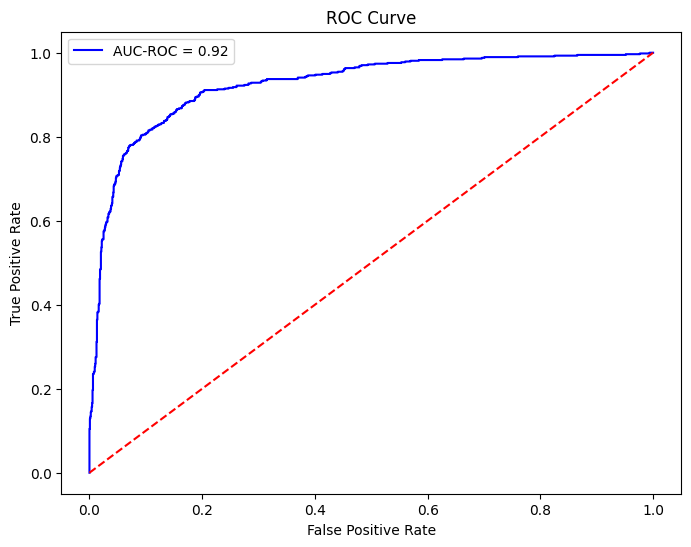

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

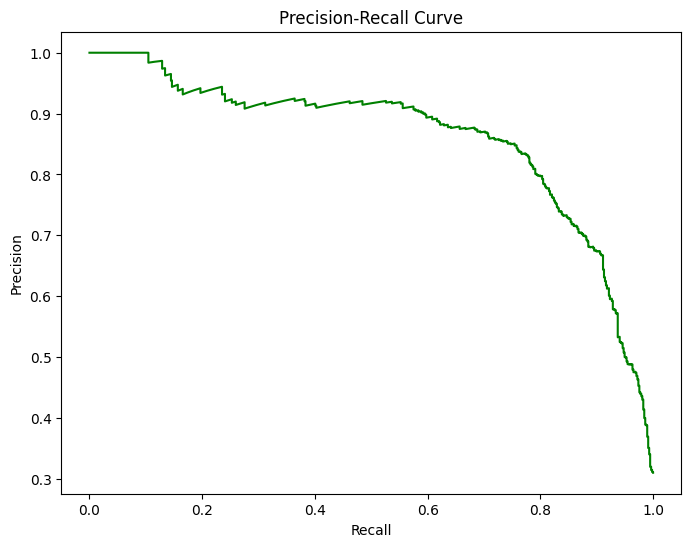

In [72]:
# Convert categorical labels to binary format
y_test_binary = y_test.map({'Non-offensive': 0, 'Offensive': 1})

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [75]:
# Initialize and train the Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [76]:
# Make predictions on the testing set
y_pred_test_nb = nb_clf.predict(X_test_tfidf)

# Evaluate the model on the testing set
print("Classification Report on Testing Set:")
print(classification_report(y_test, y_pred_test_nb))

Classification Report on Testing Set:
               precision    recall  f1-score   support

Non-offensive       0.78      0.99      0.87      1280
    Offensive       0.94      0.38      0.55       574

     accuracy                           0.80      1854
    macro avg       0.86      0.69      0.71      1854
 weighted avg       0.83      0.80      0.77      1854



In [77]:
# Evaluate the model on the training set
y_pred_train_nb = nb_clf.predict(X_train_tfidf)
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train_nb))

Classification Report on Training Set:
               precision    recall  f1-score   support

Non-offensive       0.85      1.00      0.92      5120
    Offensive       0.99      0.60      0.75      2294

     accuracy                           0.88      7414
    macro avg       0.92      0.80      0.83      7414
 weighted avg       0.89      0.88      0.87      7414



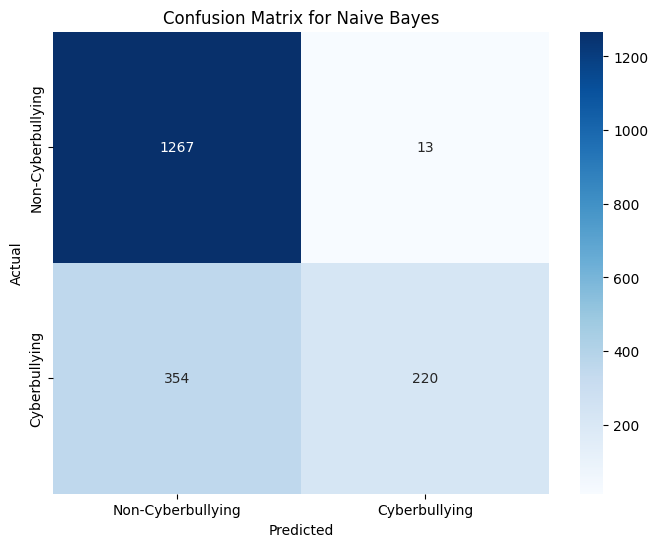

In [78]:
# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


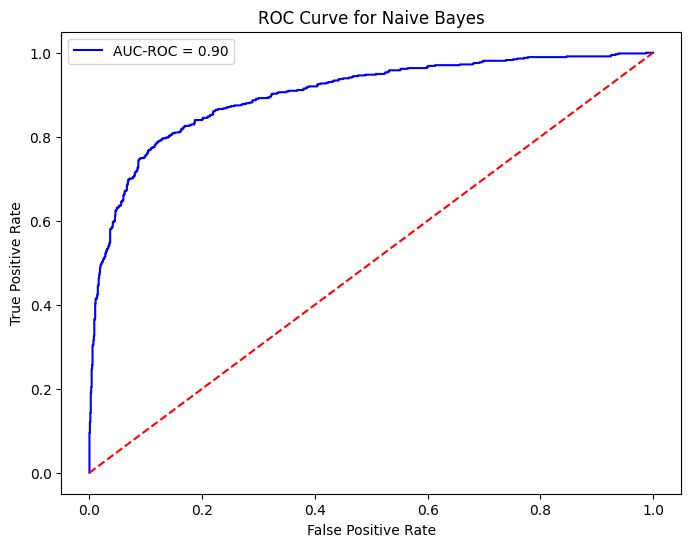

In [79]:
# ROC curve and AUC-ROC
y_pred_probs_nb = nb_clf.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_pred_probs_nb)
auc_roc_nb = roc_auc_score(y_test_binary, y_pred_probs_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'AUC-ROC = {auc_roc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

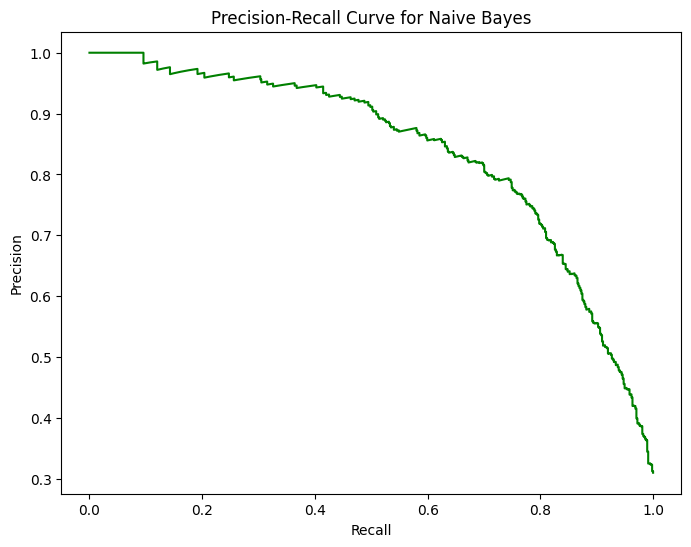

In [80]:
# Precision-Recall curve
precision_nb, recall_nb, _ = precision_recall_curve(y_test_binary, y_pred_probs_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.show()

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
df1 = pd.read_csv("/content/drive/MyDrive/Miniproject")

X = df1['full_text']
y = df1['label']
# Splitting the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf_rf = tfidf_vectorizer.fit_transform(X_train_rf)
X_test_tfidf_rf = tfidf_vectorizer.transform(X_test_rf)

rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train_tfidf_rf, y_train_rf)

# Make predictions on the training set
y_pred_train_rf = rfc.predict(X_train_tfidf_rf)

# Evaluate the model on the training set
print("Classification Report on Training Set:")
print(classification_report(y_train_rf, y_pred_train_rf))


Classification Report on Training Set:
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00      5120
    Offensive       1.00      1.00      1.00      2294

     accuracy                           1.00      7414
    macro avg       1.00      1.00      1.00      7414
 weighted avg       1.00      1.00      1.00      7414



In [82]:
X_test_tfidf_rf = tfidf_vectorizer.transform(X_test_rf)

y_pred_test_rf = rfc.predict(X_test_tfidf_rf)
cm_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)
print(cm_test_rf)
pd.crosstab(y_test_rf, y_pred_test_rf)

# Print classification report
print("Classification Report on Testing Set:")
print(classification_report(y_test_rf, y_pred_test_rf))



[[1246   34]
 [ 243  331]]
Classification Report on Testing Set:
               precision    recall  f1-score   support

Non-offensive       0.84      0.97      0.90      1280
    Offensive       0.91      0.58      0.71       574

     accuracy                           0.85      1854
    macro avg       0.87      0.78      0.80      1854
 weighted avg       0.86      0.85      0.84      1854



<Axes: >

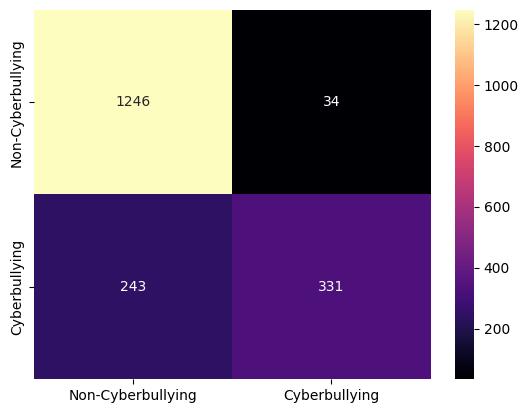

In [83]:
from sklearn.metrics import confusion_matrix
cm_train_rf = confusion_matrix(y_train_rf, y_pred_train_rf)

pd.crosstab(y_train_rf, y_pred_train_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='magma', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])



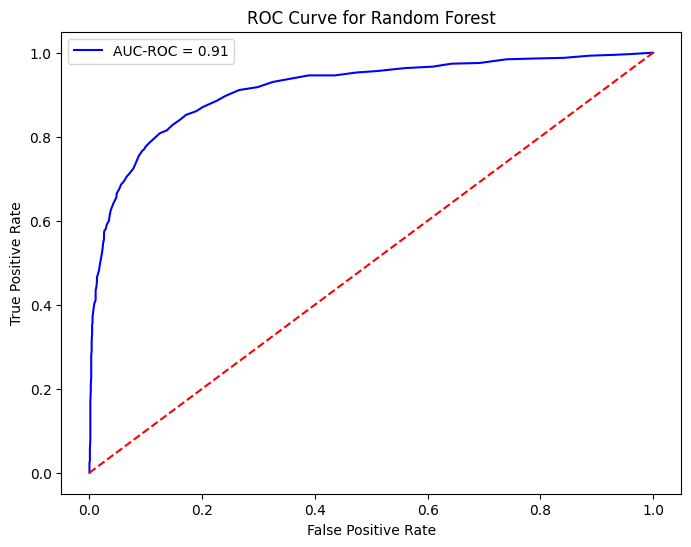

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained a RandomForestClassifier model named rfc
y_pred_probs_rf = rfc.predict_proba(X_test_tfidf_rf)[:, 1]  # Predict probabilities for the positive class

# Convert categorical labels to binary labels
y_test_binary = (y_test_rf == 'Offensive').astype(int)

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_probs_rf)  # Compute fpr and tpr
auc_roc_rf = roc_auc_score(y_test_binary, y_pred_probs_rf)  # Compute AUC-ROC score

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'AUC-ROC = {auc_roc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


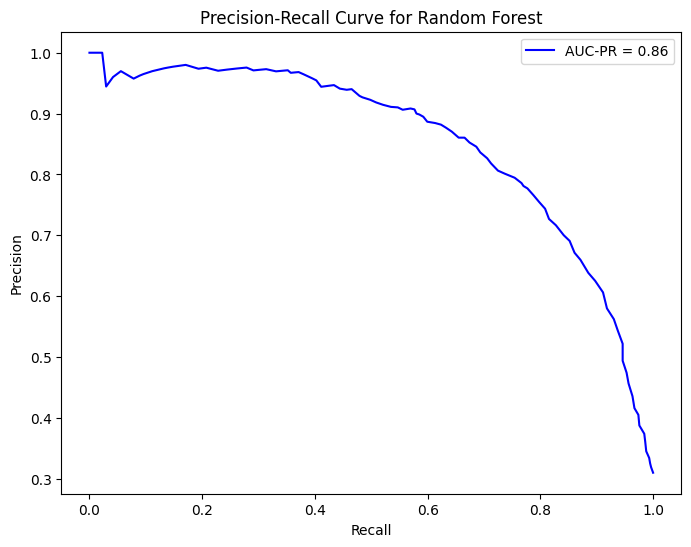

In [85]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute precision and recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test_binary, y_pred_probs_rf)

# Compute area under the curve for precision-recall curve
auc_pr_rf = auc(recall_rf, precision_rf)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', label=f'AUC-PR = {auc_pr_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()


In [94]:
# Calculate accuracy for SVM and Naive Bayes classifiers
accuracy_svm_test = (y_pred_test == y_test).mean()
accuracy_nb_test = (y_pred_test_nb == y_test).mean()
accuracy_rf_test = (y_pred_test_rf == y_test_rf).mean()


accuracy_svm_train = (y_pred_train == y_train).mean()
accuracy_nb_train = (y_pred_train_nb == y_train).mean()
accuracy_rf_train = (y_pred_train_rf == y_train_rf).mean()

# Create a DataFrame to display the accuracy comparison
accuracy_df = pd.DataFrame({
    'Method': ['SVM', 'Naive Bayes','Random forest'],
    'Test Accuracy': [accuracy_svm_test, accuracy_nb_test, accuracy_rf_test],
    'Train Accuracy': [accuracy_svm_train, accuracy_nb_train, accuracy_rf_train],
    'Train Accuracy': [accuracy_rf_train, accuracy_rf_train, accuracy_rf_train]
})

print("Accuracy Comparison between SVM, Naive Bayes and Random forest:\n")
print(accuracy_df)


Accuracy Comparison between SVM, Naive Bayes and Random forest:

          Method  Test Accuracy  Train Accuracy
0            SVM       0.875944             1.0
1    Naive Bayes       0.802050             1.0
2  Random forest       0.850593             1.0


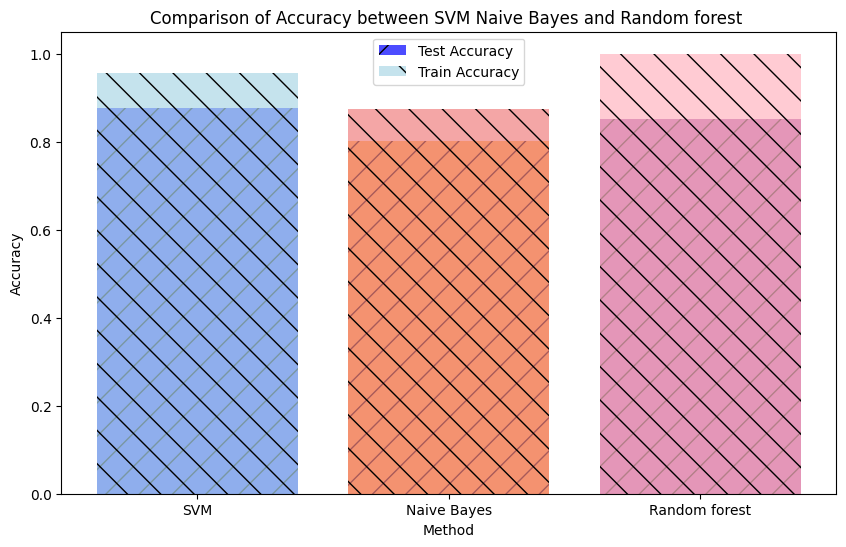

In [92]:
import matplotlib.pyplot as plt

# Create lists for methods and accuracies
methods = ['SVM', 'Naive Bayes', 'Random forest']
test_accuracies = [accuracy_svm_test, accuracy_nb_test, accuracy_rf_test]
train_accuracies = [accuracy_svm_train, accuracy_nb_train, accuracy_rf_train]

# Define colors for test and train accuracies
test_colors = ['blue', 'orange', 'purple']
train_colors = ['lightblue', 'lightcoral','lightpink']

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for test accuracies
plt.bar(methods, test_accuracies, color=test_colors, hatch='/', alpha=0.7, label='Test Accuracy')

# Plot bars for train accuracies
plt.bar(methods, train_accuracies, color=train_colors, hatch='\\', alpha=0.7, label='Train Accuracy')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between SVM Naive Bayes and Random forest ')
plt.legend()

plt.show()


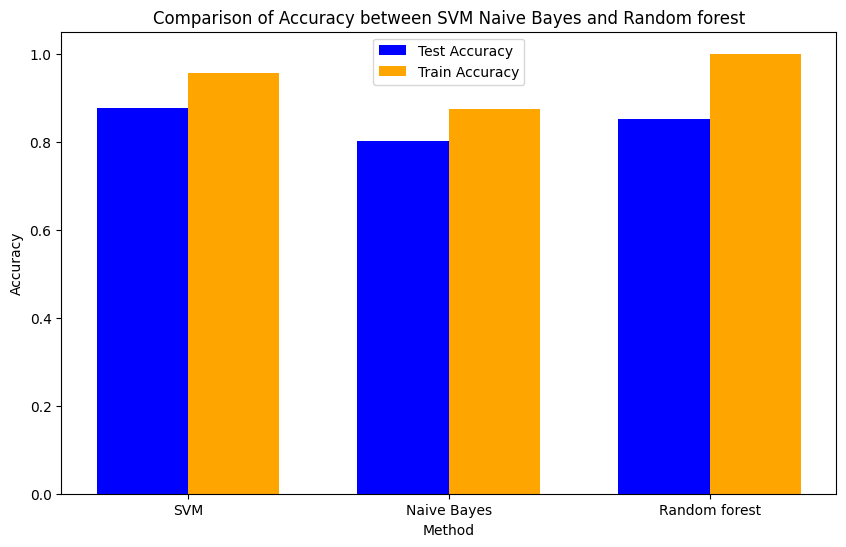

In [93]:
import numpy as np

# Define width of each bar
bar_width = 0.35

# Define index for each method
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for test accuracies
plt.bar(index, test_accuracies, bar_width, color='blue', label='Test Accuracy')

# Plot bars for train accuracies
plt.bar(index + bar_width, train_accuracies, bar_width, color='orange', label='Train Accuracy')

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between SVM Naive Bayes and Random forest')
plt.xticks(index + bar_width / 2, methods)
plt.legend()

plt.show()


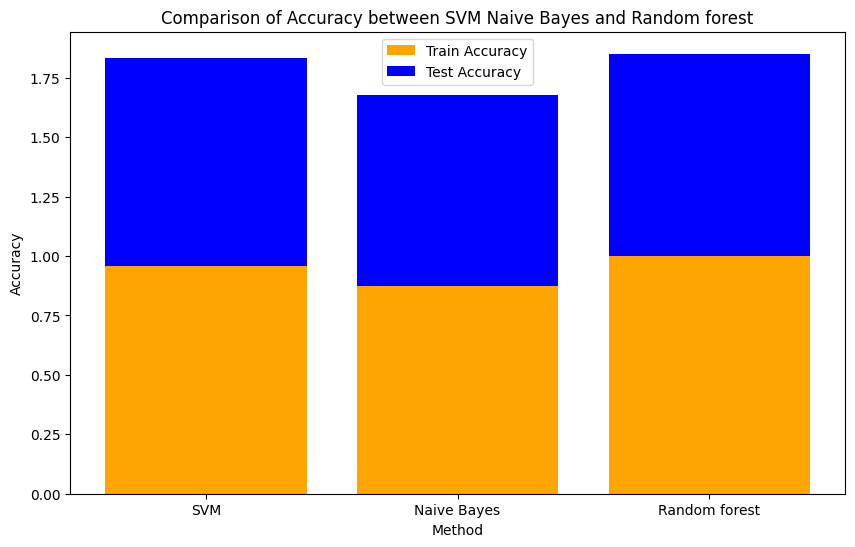

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists for methods and accuracies
methods = ['SVM', 'Naive Bayes', 'Random forest']
test_accuracies = [accuracy_svm_test, accuracy_nb_test, accuracy_rf_test]
train_accuracies = [accuracy_svm_train, accuracy_nb_train, accuracy_rf_train]

# Define index for each method
index = np.arange(len(methods))

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for train accuracies
plt.bar(index, train_accuracies, color='orange', label='Train Accuracy')

# Plot bars for test accuracies on top of train accuracies
plt.bar(index, test_accuracies, color='blue', label='Test Accuracy', bottom=train_accuracies)

# Adding labels and title
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between SVM Naive Bayes and Random forest')
plt.xticks(index, methods)
plt.legend()

plt.show()
